# Principal Component Analysis

## plot libraries

In [1]:
library(ggplot2)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



## source dataset

In [2]:
filename <- "Iris.csv"
df <- read.csv(filename)
head(df)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,3.9,1.7,0.4,Iris-setosa


## specify columns for x and y

In [3]:
cols.x <- colnames(df)[2:5]
print(cols.x)
col.y <- colnames(df)[6]
print(col.y)

[1] "SepalLengthCm" "SepalWidthCm"  "PetalLengthCm" "PetalWidthCm" 
[1] "Species"


## Scatter plots

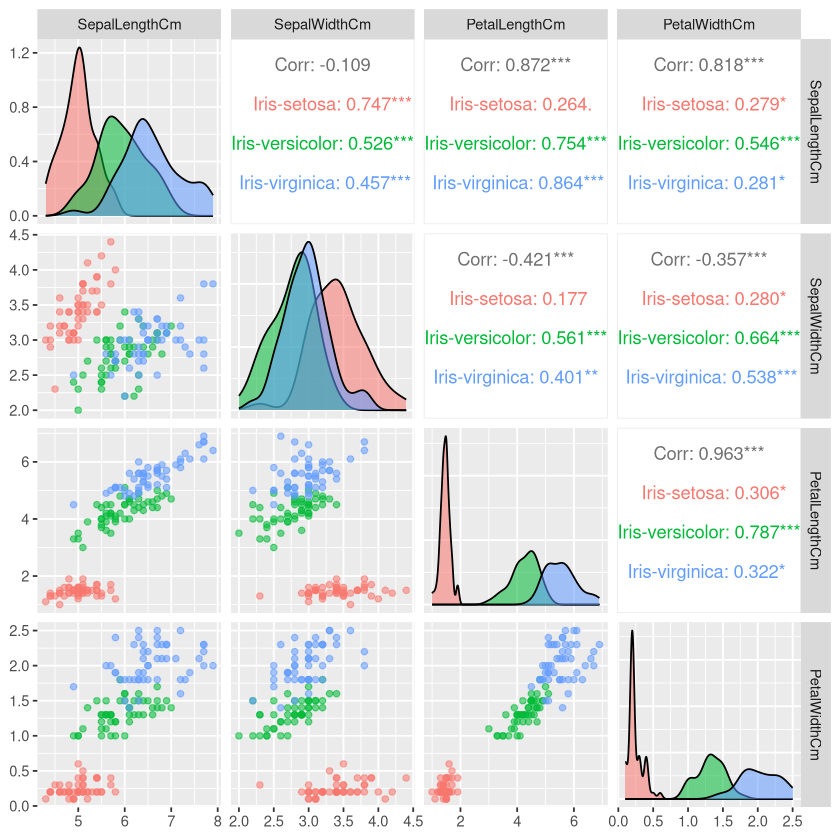

In [4]:
p <- ggpairs(
    data = df,
    columns = cols.x,
    mapping = aes(color = Species, alpha = 0.5)
)
ggsave(
    filename = "iris_011_scatter.png", 
    plot = p, 
    width = 20, 
    height = 20, 
    units = "cm"
)
show(p)

# PCA

In [5]:
pca <- prcomp(df[cols.x], scale. = TRUE)
pca

Standard deviations (1, .., p=4):
[1] 1.7061120 0.9598025 0.3838662 0.1435538

Rotation (n x k) = (4 x 4):
                     PC1         PC2        PC3        PC4
SepalLengthCm  0.5223716 -0.37231836  0.7210168  0.2619956
SepalWidthCm  -0.2633549 -0.92555649 -0.2420329 -0.1241348
PetalLengthCm  0.5812540 -0.02109478 -0.1408923 -0.8011543
PetalWidthCm   0.5656110 -0.06541577 -0.6338014  0.5235463

In [6]:
str(pca)

List of 5
 $ sdev    : num [1:4] 1.706 0.96 0.384 0.144
 $ rotation: num [1:4, 1:4] 0.522 -0.263 0.581 0.566 -0.372 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "SepalLengthCm" "SepalWidthCm" "PetalLengthCm" "PetalWidthCm"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ center  : Named num [1:4] 5.84 3.05 3.76 1.2
  ..- attr(*, "names")= chr [1:4] "SepalLengthCm" "SepalWidthCm" "PetalLengthCm" "PetalWidthCm"
 $ scale   : Named num [1:4] 0.828 0.434 1.764 0.763
  ..- attr(*, "names")= chr [1:4] "SepalLengthCm" "SepalWidthCm" "PetalLengthCm" "PetalWidthCm"
 $ x       : num [1:150, 1:4] -2.26 -2.08 -2.36 -2.3 -2.38 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 - attr(*, "class")= chr "prcomp"


In [7]:
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7061 0.9598 0.38387 0.14355
Proportion of Variance 0.7277 0.2303 0.03684 0.00515
Cumulative Proportion  0.7277 0.9580 0.99485 1.00000

In [8]:
s <- summary(pca)
str(s)

List of 6
 $ sdev      : num [1:4] 1.706 0.96 0.384 0.144
 $ rotation  : num [1:4, 1:4] 0.522 -0.263 0.581 0.566 -0.372 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "SepalLengthCm" "SepalWidthCm" "PetalLengthCm" "PetalWidthCm"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ center    : Named num [1:4] 5.84 3.05 3.76 1.2
  ..- attr(*, "names")= chr [1:4] "SepalLengthCm" "SepalWidthCm" "PetalLengthCm" "PetalWidthCm"
 $ scale     : Named num [1:4] 0.828 0.434 1.764 0.763
  ..- attr(*, "names")= chr [1:4] "SepalLengthCm" "SepalWidthCm" "PetalLengthCm" "PetalWidthCm"
 $ x         : num [1:150, 1:4] -2.26 -2.08 -2.36 -2.3 -2.38 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ importance: num [1:3, 1:4] 1.706 0.728 0.728 0.96 0.23 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "Standard deviation" "Proportion of Variance" "Cumulative Proportion"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 - attr(*, "class")

In [9]:
s$importance

,PC1,PC2,PC3,PC4
Standard deviation,1.706112,0.9598025,0.3838662,0.1435538
Proportion of Variance,0.727700,0.2303100,0.0368400,0.0051500
Cumulative Proportion,0.727700,0.9580100,0.9948500,1.0000000


In [10]:
contrib <- append(0, s$importance[3, ])
contrib

PC1     PC2     PC3     PC4 
0.00000 0.72770 0.95801 0.99485 1.00000

png 
  2

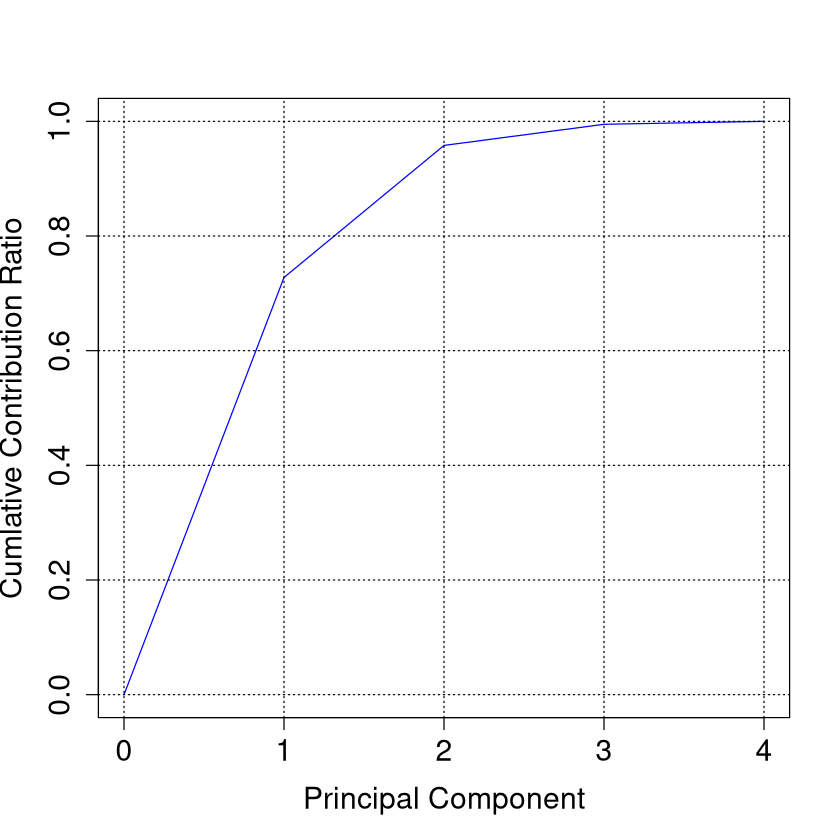

In [11]:
plot(c(0:(length(contrib) - 1)), contrib, type="l", col="blue", xlab="Principal Component", ylab="Cumlative Contribution Ratio", cex.lab=1.5, cex.axis=1.5)
grid(col="black")
png("iris_012_contrib.png", width = 500, height = 500)
plot(c(0:4), contrib, type="l", col="blue", xlab="Principal Component", ylab="Cumlative Contribution Ratio", cex.lab=1.5, cex.axis=1.5)
grid(col="black")
dev.off()

png 
  2

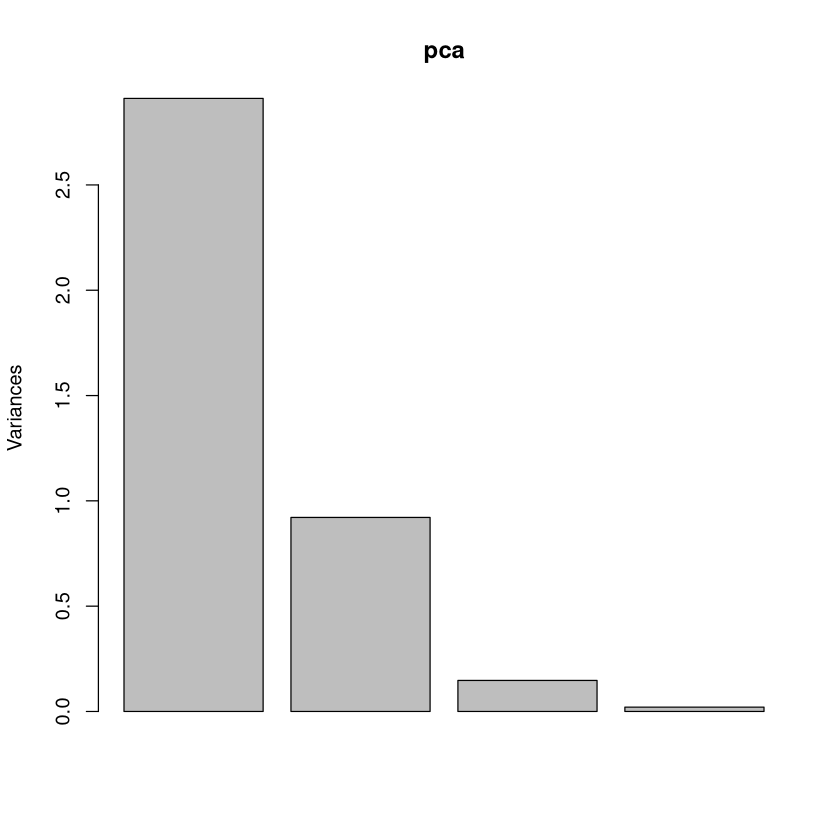

In [12]:
screeplot(pca)
png("iris_012_screeplot.png", width = 500, height = 500)
screeplot(pca)
dev.off()

In [13]:
head(pca$x)

PC1,PC2,PC3,PC4
-2.256981,-0.5040154,0.12153619,0.022996284
-2.079459,0.6532164,0.22649206,0.102863642
-2.360044,0.3174139,-0.05130774,0.027732319
-2.296504,0.5734466,-0.09853036,-0.066090054
-2.380802,-0.6725144,-0.02135630,-0.037272421
-2.063623,-1.5134783,-0.03058181,0.004384088


In [14]:
df.pca <- as.data.frame(pca$x)
cols.pc <- colnames(df.pca)
print(cols.pc)
df.pca <- cbind(df.pca, df[col.y])
head(df.pca)

[1] "PC1" "PC2" "PC3" "PC4"


,PC1,PC2,PC3,PC4,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-2.256981,-0.5040154,0.12153619,0.022996284,Iris-setosa
2,-2.079459,0.6532164,0.22649206,0.102863642,Iris-setosa
3,-2.360044,0.3174139,-0.05130774,0.027732319,Iris-setosa
4,-2.296504,0.5734466,-0.09853036,-0.066090054,Iris-setosa
5,-2.380802,-0.6725144,-0.02135630,-0.037272421,Iris-setosa
6,-2.063623,-1.5134783,-0.03058181,0.004384088,Iris-setosa


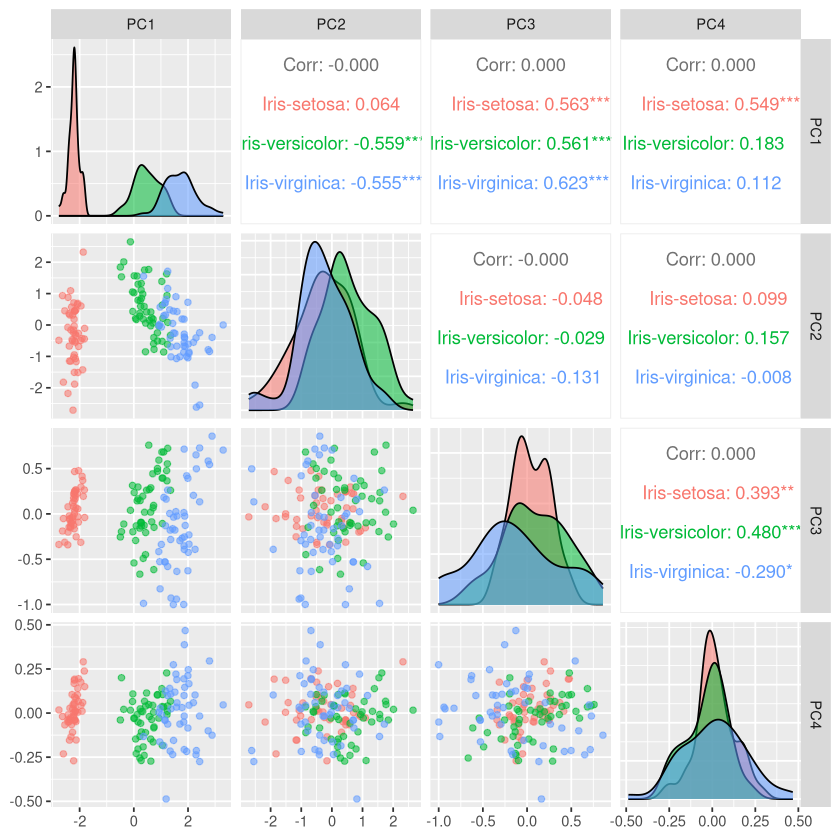

In [15]:
p <- ggpairs(
    data = df.pca,
    columns = cols.pc,
    mapping = aes(color = Species, alpha = 0.5)
)
ggsave(
    filename = "iris_013_PCA_scatter.png", 
    plot = p, 
    width = 20, 
    height = 20, 
    units = "cm"
)
show(p)

In [16]:
pca$rotation

,PC1,PC2,PC3,PC4
SepalLengthCm,0.5223716,-0.37231836,0.7210168,0.2619956
SepalWidthCm,-0.2633549,-0.92555649,-0.2420329,-0.1241348
PetalLengthCm,0.5812540,-0.02109478,-0.1408923,-0.8011543
PetalWidthCm,0.5656110,-0.06541577,-0.6338014,0.5235463


png 
  2

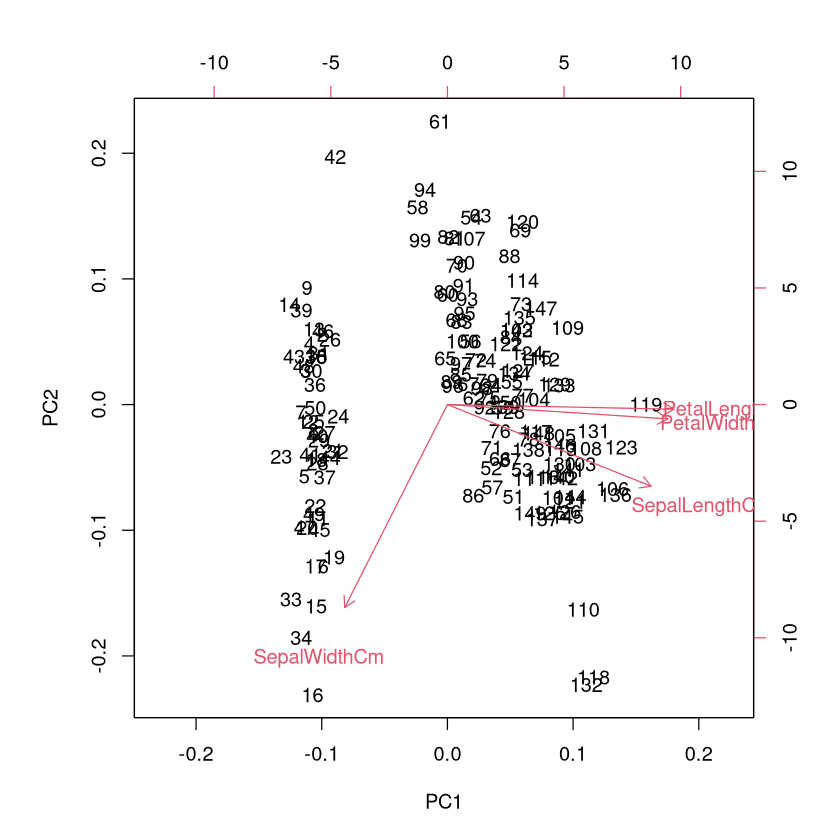

In [17]:
biplot(pca, cex = 1)
png("iris_014_loading.png", width = 500, height = 500)
biplot(pca, cex = 1)
dev.off()